<a href="https://colab.research.google.com/github/escapestring/Gender-Pay-Gap/blob/main/codes/Main_ML_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Needed Libriaries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Import basic python Libraries for data cleaning, manipulation and plots
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# SQL libraries for Queries
from pandasql import sqldf #import sql from panda
pysqldf = lambda q: sqldf(q, globals()) #lambada function to pass query

In [9]:
# Statistics and Machine Learning Libraries
import statsmodels.api as sm
from scipy import stats
from functools import reduce
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.sandbox.regression.predstd import wls_prediction_std

Import Data and Making backup copies

In [10]:
# import data
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Gender-Pay-Gap/Data/cleaned_gpg_data.csv")

In [11]:
#view data
data.head()

,employee_id,gender,annual_salary_amount_in_usd,job_experience,job_pay_level,full_or_part_time,hourly_or_salary,job_family_group,job_continent
0,100650518,Female,45000.00,2,Second Year Associate,Full time,Salary,Client Strategy,Americas
1,100362807,Male,41644.08,9,Team Lead,Full time,Salary,Catering,Oceania
2,100568527,Female,42134.82,5,Junior Associate,Full time,Salary,Client Strategy,Europe
3,100296166,Female,43667.64,6,Team Lead,Full time,Salary,Catering,Asia
4,100825514,Female,63750.00,7,Senior Associate,Full time,Salary,Graphic Design,Americas


In [ ]:
# let employee id be index
data.set_index("employee_id", inplace=True)
data.head()

,gender,annual_salary_amount_in_usd,job_experience,job_pay_level,full_or_part_time,hourly_or_salary,job_family_group,job_continent
employee_id,,,,,,,,
100650518,Female,45000.00,2,Second Year Associate,Full time,Salary,Client Strategy,Americas
100362807,Male,41644.08,9,Team Lead,Full time,Salary,Catering,Oceania
100568527,Female,42134.82,5,Junior Associate,Full time,Salary,Client Strategy,Europe
100296166,Female,43667.64,6,Team Lead,Full time,Salary,Catering,Asia
100825514,Female,63750.00,7,Senior Associate,Full time,Salary,Graphic Design,Americas


In [ ]:
# make copies of data for future manipulations and use
df1 = data.copy()
df2 = data.copy()
df3 = data.copy()

Exploring Data

In [ ]:
# explore data
df1

,gender,annual_salary_amount_in_usd,job_experience,job_pay_level,full_or_part_time,hourly_or_salary,job_family_group,job_continent
employee_id,,,,,,,,
100650518,Female,45000.00,2,Second Year Associate,Full time,Salary,Client Strategy,Americas
100362807,Male,41644.08,9,Team Lead,Full time,Salary,Catering,Oceania
100568527,Female,42134.82,5,Junior Associate,Full time,Salary,Client Strategy,Europe
100296166,Female,43667.64,6,Team Lead,Full time,Salary,Catering,Asia
100825514,Female,63750.00,7,Senior Associate,Full time,Salary,Graphic Design,Americas
...,...,...,...,...,...,...,...,...
100439883,Male,48000.00,5,Junior Associate,Full time,Salary,Catering,Americas
100035325,Male,75000.00,5,Junior Associate,Full time,Salary,Investment,Americas
100932674,Female,26520.00,1,Second Year Associate,Full time,Hourly,Catering,Americas


In [ ]:
# Validate data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 100650518 to 100204255
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1920 non-null   object 
 1   annual_salary_amount_in_usd  1920 non-null   float64
 2   job_experience               1920 non-null   int64  
 3   job_pay_level                1920 non-null   object 
 4   full_or_part_time            1920 non-null   object 
 5   hourly_or_salary             1920 non-null   object 
 6   job_family_group             1920 non-null   object 
 7   job_continent                1920 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 135.0+ KB


# Statistical Analysis of Data

###  Encoding of Data

In [ ]:
# assign dependent variable (y) and independent variables (X)
X = df1.drop("annual_salary_amount_in_usd", axis=1)
y = df1[["annual_salary_amount_in_usd"]]

In [ ]:
# view data
X.head(10)

,gender,job_experience,job_pay_level,full_or_part_time,hourly_or_salary,job_family_group,job_continent
employee_id,,,,,,,
100650518,Female,2,Second Year Associate,Full time,Salary,Client Strategy,Americas
100362807,Male,9,Team Lead,Full time,Salary,Catering,Oceania
100568527,Female,5,Junior Associate,Full time,Salary,Client Strategy,Europe
100296166,Female,6,Team Lead,Full time,Salary,Catering,Asia
100825514,Female,7,Senior Associate,Full time,Salary,Graphic Design,Americas
100088896,Female,9,Team Lead,Full time,Salary,Technology Services,Americas
100626372,Male,2,Junior Associate,Full time,Salary,Catering,Americas
100874112,Female,17,Manger II,Full time,Salary,Technology Services,Asia
100782843,Female,4,Junior Associate,Full time,Salary,Customer Experience,Americas


In [ ]:
# encode your data categorical independent variables (X)
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.head() #view encoded data

,job_experience,gender_Male,job_pay_level_Director II,job_pay_level_Entry Level,job_pay_level_Junior Associate,job_pay_level_Manager,job_pay_level_Manger II,job_pay_level_Partner,job_pay_level_Second Year Associate,job_pay_level_Senior Associate,...,job_family_group_Patent Law,job_family_group_Pricing Analytics,job_family_group_R&D,job_family_group_Research,job_family_group_Strategy,job_family_group_Technology Services,job_continent_Americas,job_continent_Asia,job_continent_Europe,job_continent_Oceania
employee_id,,,,,,,,,,,,,,,,,,,,,
100650518,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
100362807,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100568527,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
100296166,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100825514,7,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Running Regression Analysis

In [ ]:
# Add a constant to the model (intercept)
X = sm.add_constant(X)

/Users/ifeanyichukwumichaelifiegbu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Fit OLS regression model 1
OLS_model1 = sm.OLS(y, X).fit()

In [ ]:
# show model summary
OLS_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     annual_salary_amount_in_usd   R-squared:                       0.809
Model:                                     OLS   Adj. R-squared:                  0.806
Method:                          Least Squares   F-statistic:                     234.8
Date:                         Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                                 15:01:45   Log-Likelihood:                -22121.
No. Observations:                         1920   AIC:                         4.431e+04
Df Residuals:                             1885   BIC:                         4.451e+04
Df Model:                                   34                                         
Covariance Type:                     nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1.556e+05   1.53e+04     10.161      0.000    1.26e+05    1.86e+05
job_experience                           526.2002     96.604      5.447      0.000     336.737     715.663
gender_Male                             2577.4757   1201.327      2.146      0.032     221.405    4933.546
job_pay_level_Director II                8.34e+04   1.07e+04      7.793      0.000    6.24e+04    1.04e+05
job_pay_level_Entry Level              -1.753e+05   5151.144    -34.034      0.000   -1.85e+05   -1.65e+05
job_pay_level_Junior Associate         -1.605e+05   4464.657    -35.959      0.000   -1.69e+05   -1.52e+05
job_pay_level_Manager                  -1.117e+05   4607.333    -24.238      0.000   -1.21e+05   -1.03e+05
job_pay_level_Manger II                -9.307e+04   4739.541    -19.638      0.000   -1.02e+05   -8.38e+04
job_pay_level_Partner                  -9.797e+04   1.97e+04     -4.981      0.000   -1.37e+05   -5.94e+04
job_pay_level_Second Year Associate    -1.685e+05   4879.385    -34.529      0.000   -1.78e+05   -1.59e+05
job_pay_level_Senior Associate         -1.516e+05   4473.070    -33.896      0.000    -1.6e+05   -1.43e+05
job_pay_level_Sr Manager               -5.775e+04   5235.028    -11.031      0.000    -6.8e+04   -4.75e+04
job_pay_level_Team Lead                -1.365e+05   4425.454    -30.847      0.000   -1.45e+05   -1.28e+05
job_pay_level_VP                        2.614e+05    1.5e+04     17.470      0.000    2.32e+05    2.91e+05
full_or_part_time_Part time            -1.636e+04   6615.229     -2.473      0.014   -2.93e+04   -3382.926
hourly_or_salary_Salary                -1606.6570   2790.117     -0.576      0.565   -7078.699    3865.385
job_family_group_Client Strategy        1.184e+04   2188.548      5.412      0.000    7551.876    1.61e+04
job_family_group_Client Techology       1.869e+04   3922.861      4.765      0.000     1.1e+04    2.64e+04
job_family_group_Customer Experience    1.549e+04   2423.753      6.390      0.000    1.07e+04    2.02e+04
job_family_group_Expansion              1.818e+04   2608.543      6.971      0.000    1.31e+04    2.33e+04
job_family_group_Government Consulting  6516.4595   3596.579      1.812      0.070    -537.235    1.36e+04
job_family_group_Graphic Design         2.067e+04   3596.060      5.749      0.000    1.36e+04    2.77e+04
job_family_group_IPO Strategy           1.255e+04   6837.846      1.835      0.067    -862.387     2.6e+04
job_family_group_Investment             2.334e+04   3040.801      7.676      0.000    1.74e+04    2.93e+04
job_family_group_Leadership             4.355e+04   9191.583      4.738      0.000    2.55e+04 

In [ ]:
# Fit OLS regression model 1
WLS = sm.WLS(y, X, weights=weights).fit()

In [ ]:
mm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     WLS Regression Results                                     
================================================================================================
Dep. Variable:     annual_salary_amount_in_usd   R-squared (uncentered):                   0.940
Model:                                     WLS   Adj. R-squared (uncentered):              0.939
Method:                          Least Squares   F-statistic:                              871.5
Date:                         Mon, 08 Jan 2024   Prob (F-statistic):                        0.00
Time:                                 01:00:05   Log-Likelihood:                         -21771.
No. Observations:                         1920   AIC:                                  4.361e+04
Df Residuals:                             1886   BIC:                                  4.380e+04
Df Model:                                   34                                                  
Covariance Type:                     nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
job_experience                           319.1400     64.243      4.968      0.000     193.144     445.136
gender_Male                             2281.1199    863.535      2.642      0.008     587.536    3974.704
job_pay_level_Director II               4.715e+04    1.6e+04      2.945      0.003    1.57e+04    7.85e+04
job_pay_level_Entry Level               -1.42e+05   3963.674    -35.826      0.000    -1.5e+05   -1.34e+05
job_pay_level_Junior Associate         -1.267e+05   3693.451    -34.317      0.000   -1.34e+05    -1.2e+05
job_pay_level_Manager                  -8.362e+04   3938.765    -21.229      0.000   -9.13e+04   -7.59e+04
job_pay_level_Manger II                 -6.91e+04   4066.434    -16.994      0.000   -7.71e+04   -6.11e+04
job_pay_level_Partner                  -1.065e+05   1.06e+05     -1.009      0.313   -3.13e+05       1e+05
job_pay_level_Second Year Associate    -1.327e+05   3928.470    -33.767      0.000    -1.4e+05   -1.25e+05
job_pay_level_Senior Associate         -1.207e+05   3791.112    -31.834      0.000   -1.28e+05   -1.13e+05
job_pay_level_Sr Manager                -2.66e+04   4437.875     -5.994      0.000   -3.53e+04   -1.79e+04
job_pay_level_Team Lead                -1.063e+05   3709.918    -28.645      0.000   -1.14e+05    -9.9e+04
job_pay_level_VP                        2.534e+05   1.41e+04     18.020      0.000    2.26e+05    2.81e+05
full_or_part_time_Part time            -1.266e+04   3178.508     -3.982      0.000   -1.89e+04   -6422.670
hourly_or_salary_Salary                 3229.7137   1737.299      1.859      0.063    -177.517    6636.944
job_family_group_Client Strategy        1.494e+04   1780.390      8.392      0.000    1.14e+04    1.84e+04
job_family_group_Client Techology       2.007e+04   4282.638      4.688      0.000    1.17e+04    2.85e+04
job_family_group_Customer Experience    1.663e+04   2050.592      8.109      0.000    1.26e+04    2.07e+04
job_family_group_Expansion              2.136e+04   2500.482      8.541      0.000    1.65e+04    2.63e+04
job_family_group_Government Consulting  8581.5100   1700.085      5.048      0.000    5247.265    1.19e+04
job_family_group_Graphic Design         2.557e+04   5878.597      4.350      0.000     1.4e+04    3.71e+04
job_family_group_IPO Strategy           1.754e+04   3686.387      4.758      0.000    1.03e+04    2.48e+04
job_family_group_Investment             2.618e+04   2063.117     12.689      0.000    2.21e+04    3.02e+04
job_family_group_Leadership             8.961e+04   4.19e+04      2.137      0.033    7377.683    1.72e

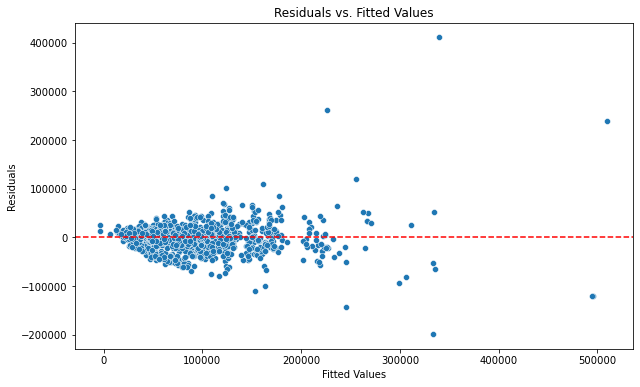

In [ ]:
# Draw residual plot of fitted OLS model
fitted_values = OLS_model1.fittedvalues
residuals = OLS_model1.resid

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

In [ ]:
# Calculate variance of residuals
residual_variance = residuals.var()

print(f"Residual Variance: {residual_variance}")

Residual Variance: 595469829.8893706


### Analysis of Variance for Different Categories (for purpose of weights assignment to data point)

#### Split Data into Categories using (Job Family Group)

In [ ]:
df1.head() #view data

,gender,annual_salary_amount_in_usd,job_experience,job_pay_level,full_or_part_time,hourly_or_salary,job_family_group,job_continent
employee_id,,,,,,,,
100650518,Female,45000.00,2,Second Year Associate,Full time,Salary,Client Strategy,Americas
100362807,Male,41644.08,9,Team Lead,Full time,Salary,Catering,Oceania
100568527,Female,42134.82,5,Junior Associate,Full time,Salary,Client Strategy,Europe
100296166,Female,43667.64,6,Team Lead,Full time,Salary,Catering,Asia
100825514,Female,63750.00,7,Senior Associate,Full time,Salary,Graphic Design,Americas


In [ ]:
#group data by job family group
grouped = df1.groupby("job_family_group")

In [ ]:
# create dictionary to hold all grouped dataframe
dfs = {group: data for group, data in grouped} # group name as key, and dataframe as value

In [ ]:
# view dictionary keys ( various categories of dataframe)
keys = [i for i in dfs.keys()]

keys

['Catering',
 'Client Strategy',
 'Client Techology',
 'Customer Experience',
 'Expansion',
 'Government Consulting',
 'Graphic Design',
 'IPO Strategy',
 'Investment',
 'Leadership',
 'Patent Law',
 'Pricing Analytics',
 'R&D',
 'Research',
 'Strategy',
 'Technology Services']

In [ ]:
# check dictionary (top 5 of Client Strategy job family group data)
dfs["Client Strategy"].head()

,gender,annual_salary_amount_in_usd,job_experience,job_pay_level,full_or_part_time,hourly_or_salary,job_family_group,job_continent
employee_id,,,,,,,,
100650518,Female,45000.00,2,Second Year Associate,Full time,Salary,Client Strategy,Americas
100568527,Female,42134.82,5,Junior Associate,Full time,Salary,Client Strategy,Europe
100891145,Male,75000.00,21,Team Lead,Full time,Salary,Client Strategy,Americas
100887818,Male,52500.00,18,Junior Associate,Full time,Salary,Client Strategy,Americas
100607050,Male,82500.00,6,Team Lead,Full time,Salary,Client Strategy,Americas


In [ ]:
# Function to one-hot encode and calculate variance
def process_df(df):
    # One-hot encode categorical variables
    df_encoded = pd.get_dummies(df, drop_first=True)

    # Fit OLS regression and calculate variance
    X = df_encoded.drop("annual_salary_amount_in_usd", axis=1)  # Assuming 'column_4' is the dependent variable
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(df["annual_salary_amount_in_usd"], X).fit()
    residuals_variance = model.resid.var()

    small_number = 0.0015  # to avoid zero division

    # Add weight column to dataframe (inverse of residual variance)
    df_encoded["weight"] = 1 / (residuals_variance + small_number)

    return df_encoded

In [ ]:
# Apply the function to each DataFrame in the dictionary
processed_dfs = {k: process_df(v) for k, v in dfs.items()}

/Users/ifeanyichukwumichaelifiegbu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# check dictionary
processed_dfs["Client Strategy"].head()

,annual_salary_amount_in_usd,job_experience,gender_Male,job_pay_level_Director II,job_pay_level_Entry Level,job_pay_level_Junior Associate,job_pay_level_Manager,job_pay_level_Manger II,job_pay_level_Second Year Associate,job_pay_level_Senior Associate,job_pay_level_Sr Manager,job_pay_level_Team Lead,hourly_or_salary_Salary,job_continent_Asia,job_continent_Europe,job_continent_Oceania,weight
employee_id,,,,,,,,,,,,,,,,,
100650518,45000.00,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2.920726e-09
100568527,42134.82,5,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2.920726e-09
100891145,75000.00,21,1,0,0,0,0,0,0,0,0,1,1,0,0,0,2.920726e-09
100887818,52500.00,18,1,0,0,1,0,0,0,0,0,0,1,0,0,0,2.920726e-09
100607050,82500.00,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,2.920726e-09


In [ ]:
# Extract the unique weight for each DataFrame
weights = {key: df["weight"].iloc[0] for key, df in processed_dfs.items()}

# Convert the dictionary to a DataFrame
weights_df = pd.DataFrame(list(weights.items()), columns=["JobFamilyGroup", "UniqueWeight"])

weights_df

,JobFamilyGroup,UniqueWeight
0,Catering,1.005067e-08
1,Client Strategy,2.920726e-09
2,Client Techology,2.055535e-09
3,Customer Experience,2.930875e-09
4,Expansion,2.219937e-09
5,Government Consulting,1.411990e-08
6,Graphic Design,8.649861e-10
7,IPO Strategy,1.005992e-08
8,Investment,5.610108e-09
9,Leadership,8.994134e-11


In [ ]:
# map weights to copy of original dataframe (df2)
df2["weight"] = df2["job_family_group"].map(weights)

In [ ]:
# view sample of dataframe
df2.head()

,gender,annual_salary_amount_in_usd,job_experience,job_pay_level,full_or_part_time,hourly_or_salary,job_family_group,job_continent,weight
employee_id,,,,,,,,,
100650518,Female,45000.00,2,Second Year Associate,Full time,Salary,Client Strategy,Americas,2.920726e-09
100362807,Male,41644.08,9,Team Lead,Full time,Salary,Catering,Oceania,1.005067e-08
100568527,Female,42134.82,5,Junior Associate,Full time,Salary,Client Strategy,Europe,2.920726e-09
100296166,Female,43667.64,6,Team Lead,Full time,Salary,Catering,Asia,1.005067e-08
100825514,Female,63750.00,7,Senior Associate,Full time,Salary,Graphic Design,Americas,8.649861e-10


#### Encode new data with weights for model building

In [ ]:
# Encode categorical variables of data (binary-encoding)
df2_encoded = pd.get_dummies(df2, drop_first=True)

In [ ]:
# view sample of encoded dataframe
df2_encoded.head()

,annual_salary_amount_in_usd,job_experience,weight,gender_Male,job_pay_level_Director II,job_pay_level_Entry Level,job_pay_level_Junior Associate,job_pay_level_Manager,job_pay_level_Manger II,job_pay_level_Partner,...,job_family_group_Patent Law,job_family_group_Pricing Analytics,job_family_group_R&D,job_family_group_Research,job_family_group_Strategy,job_family_group_Technology Services,job_continent_Americas,job_continent_Asia,job_continent_Europe,job_continent_Oceania
employee_id,,,,,,,,,,,,,,,,,,,,,
100650518,45000.00,2,2.920726e-09,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
100362807,41644.08,9,1.005067e-08,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100568527,42134.82,5,2.920726e-09,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
100296166,43667.64,6,1.005067e-08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100825514,63750.00,7,8.649861e-10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Define dependent variable, independent variables and weights
X = df2_encoded.drop(["annual_salary_amount_in_usd", "weight"], axis=1)
y = df2_encoded["annual_salary_amount_in_usd"]
weights = df2_encoded["weight"]

In [ ]:
# Splitting Data into train and validation sets
X_train, X_val, y_train, y_val, weights_train, weights_val = train_test_split(X, y, weights, train_size=0.6, random_state=42)

In [ ]:
# Adding a constant to the model (for the intercept)
X_train = sm.add_constant(X_train)
X_val = sm.add_constant(X_val)

/Users/ifeanyichukwumichaelifiegbu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Train OLS Model

In [ ]:
# Building the OLS model
OLS_model2 = sm.OLS(y_train, X_train).fit()

In [ ]:
# Check goodness of fit for OLS model built
OLS_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     annual_salary_amount_in_usd   R-squared:                       0.830
Model:                                     OLS   Adj. R-squared:                  0.825
Method:                          Least Squares   F-statistic:                     166.0
Date:                         Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                                 15:02:38   Log-Likelihood:                -13284.
No. Observations:                         1152   AIC:                         2.664e+04
Df Residuals:                             1118   BIC:                         2.681e+04
Df Model:                                   33                                         
Covariance Type:                     nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1.288e+05   2.66e+04      4.836      0.000    7.65e+04    1.81e+05
job_experience                           578.0006    126.604      4.565      0.000     329.592     826.409
gender_Male                             2199.5086   1577.828      1.394      0.164    -896.329    5295.347
job_pay_level_Director II               1.316e+05   1.26e+04     10.445      0.000    1.07e+05    1.56e+05
job_pay_level_Entry Level              -1.674e+05   6707.138    -24.956      0.000   -1.81e+05   -1.54e+05
job_pay_level_Junior Associate          -1.52e+05   5720.361    -26.579      0.000   -1.63e+05   -1.41e+05
job_pay_level_Manager                  -1.041e+05   5820.433    -17.893      0.000   -1.16e+05   -9.27e+04
job_pay_level_Manger II                -8.434e+04   6107.467    -13.809      0.000   -9.63e+04   -7.24e+04
job_pay_level_Partner                  -1.159e-10   3.11e-11     -3.726      0.000   -1.77e-10   -5.48e-11
job_pay_level_Second Year Associate    -1.584e+05   6197.595    -25.555      0.000   -1.71e+05   -1.46e+05
job_pay_level_Senior Associate         -1.426e+05   5729.093    -24.899      0.000   -1.54e+05   -1.31e+05
job_pay_level_Sr Manager               -4.663e+04   6754.261     -6.904      0.000   -5.99e+04   -3.34e+04
job_pay_level_Team Lead                -1.253e+05   5629.799    -22.261      0.000   -1.36e+05   -1.14e+05
job_pay_level_VP                        2.721e+05   1.56e+04     17.427      0.000    2.42e+05    3.03e+05
full_or_part_time_Part time            -1.503e+04   1.05e+04     -1.437      0.151   -3.56e+04    5499.594
hourly_or_salary_Salary                -1218.7308   3845.999     -0.317      0.751   -8764.920    6327.458
job_family_group_Client Strategy          1.4e+04   2930.578      4.778      0.000    8252.719    1.98e+04
job_family_group_Client Techology       2.377e+04   5303.717      4.482      0.000    1.34e+04    3.42e+04
job_family_group_Customer Experience     1.61e+04   3243.301      4.964      0.000    9736.641    2.25e+04
job_family_group_Expansion              2.077e+04   3379.771      6.145      0.000    1.41e+04    2.74e+04
job_family_group_Government Consulting  8232.8780   4737.826      1.738      0.083   -1063.154    1.75e+04
job_family_group_Graphic Design         1.236e+04   4763.076      2.595      0.010    3016.345    2.17e+04
job_family_group_IPO Strategy           1.249e+04   9194.344      1.359      0.175   -5549.402    3.05e+04
job_family_group_Investment             2.137e+04   3923.497      5.448      0.000    1.37e+04    2.91e+04
job_family_group_Leadership             5.591e+04   1.07e+04      5.205      0.000    3.48e+04 

#### Feature Selection

In [ ]:
# Create Selector
select = SelectKBest(k=2, score_func=f_regression)
select.fit(X_train, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x7f89dabae1f0>)

In [ ]:
# Create range of encoded independent variables to iterate through
k_range=list(range(1, 35))

In [ ]:
# run OLS regression on iterative increasing number of independent variables added to the model
k_score = []
for i in k_range:
    select = SelectKBest(k=i, score_func=f_regression)
    select.fit(X_train, y_train)

    new_X_train = select.transform(X_train)
    new_X_val = select.transform(X_val)

    # Adding a constant to the model (for the intercept)
    new_X_train_sm = sm.add_constant(new_X_train)
    new_X_val_sm = sm.add_constant(new_X_val)

    # Building and fitting the OLS model
    model = sm.OLS(y_train, new_X_train_sm).fit()

    # Calculating the score ( Adjusted R-squared) on validation data
    r_squared = model.rsquared_adj
    k_score.append(r_squared)

k_score.sort()
print(f"Maximum Adjusted R-squared: {round(k_score[-1], 4)}")

Maximum Adjusted R-squared: 0.8255


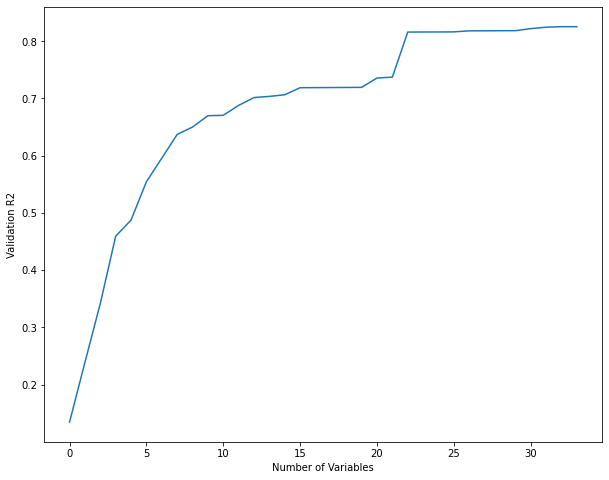

In [ ]:
# Plot R-squared by number of independent variables fitted into the model
plt.figure(figsize=(10,8))
plt.plot(k_score)
plt.xlabel("Number of Variables")
plt.ylabel("Validation R2")
plt.show()

#### Build and Train WLS Model

In [ ]:
# Build and Train WLS model
WLS_model1 = sm.WLS(y_train, X_train, weights=weights_train).fit()

In [ ]:
# Check goodness of fit for WLS model
WLS_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:     annual_salary_amount_in_usd   R-squared:                       0.861
Model:                                     WLS   Adj. R-squared:                  0.857
Method:                          Least Squares   F-statistic:                     210.5
Date:                         Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                                 15:02:45   Log-Likelihood:                -13001.
No. Observations:                         1152   AIC:                         2.607e+04
Df Residuals:                             1118   BIC:                         2.624e+04
Df Model:                                   33                                         
Covariance Type:                     nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1.363e+05   2.82e+04      4.835      0.000     8.1e+04    1.92e+05
job_experience                           121.4070     78.323      1.550      0.121     -32.270     275.084
gender_Male                             1099.4259   1069.564      1.028      0.304    -999.152    3198.004
job_pay_level_Director II               3.442e+04      2e+04      1.725      0.085   -4741.374    7.36e+04
job_pay_level_Entry Level              -1.726e+05   5003.061    -34.506      0.000   -1.82e+05   -1.63e+05
job_pay_level_Junior Associate         -1.546e+05   4561.805    -33.883      0.000   -1.64e+05   -1.46e+05
job_pay_level_Manager                  -1.078e+05   4700.602    -22.930      0.000   -1.17e+05   -9.86e+04
job_pay_level_Manger II                -9.417e+04   4962.133    -18.977      0.000   -1.04e+05   -8.44e+04
job_pay_level_Partner                   2.611e-11   4.21e-11      0.620      0.535   -5.65e-11    1.09e-10
job_pay_level_Second Year Associate    -1.623e+05   4938.335    -32.874      0.000   -1.72e+05   -1.53e+05
job_pay_level_Senior Associate         -1.475e+05   4661.223    -31.643      0.000   -1.57e+05   -1.38e+05
job_pay_level_Sr Manager               -4.857e+04   5525.655     -8.790      0.000   -5.94e+04   -3.77e+04
job_pay_level_Team Lead                -1.309e+05   4554.254    -28.735      0.000    -1.4e+05   -1.22e+05
job_pay_level_VP                        2.344e+05   1.36e+04     17.261      0.000    2.08e+05    2.61e+05
full_or_part_time_Part time            -1.321e+04   4544.935     -2.907      0.004   -2.21e+04   -4295.964
hourly_or_salary_Salary                -2495.9105   2252.622     -1.108      0.268   -6915.752    1923.931
job_family_group_Client Strategy        1.738e+04   2183.093      7.962      0.000    1.31e+04    2.17e+04
job_family_group_Client Techology       2.634e+04   5352.212      4.922      0.000    1.58e+04    3.68e+04
job_family_group_Customer Experience    1.891e+04   2529.371      7.476      0.000    1.39e+04    2.39e+04
job_family_group_Expansion              2.482e+04   2961.098      8.383      0.000     1.9e+04    3.06e+04
job_family_group_Government Consulting  1.192e+04   2107.298      5.657      0.000    7786.153    1.61e+04
job_family_group_Graphic Design          1.81e+04   7174.786      2.523      0.012    4022.014    3.22e+04
job_family_group_IPO Strategy            1.41e+04   4604.199      3.063      0.002    5071.019    2.31e+04
job_family_group_Investment             2.511e+04   2462.419     10.199      0.000    2.03e+04    2.99e+04
job_family_group_Leadership             1.024e+05    4.4e+04      2.325      0.020     1.6e+04 

### Model Validation

In [ ]:
# Models prediction
OLS_y_pred = OLS_model2.predict(X_val)
WLS_y_pred = WLS_model1.predict(X_val)

Evaluating the Models

In [ ]:
# OLS Model
OLS_mse = mean_squared_error(y_val, OLS_y_pred)
OLS_r2 = r2_score(y_val, OLS_y_pred)
OLS_rmse = np.sqrt(OLS_mse)

print(f"OLS Model Mean Squared Error: {round(OLS_mse, 2)}")
print(f"OLS Model R-squared: {round(OLS_r2, 4)}")
print(f"OLS Model Root Mean Squared Error: {round(OLS_rmse, 2)}")

OLS Model Mean Squared Error: 647997286.15
OLS Model R-squared: 0.7292
OLS Model Root Mean Squared Error: 25455.79


In [ ]:
# WLS Model
WLS_mse = mean_squared_error(y_val, WLS_y_pred)
WLS_r2 = r2_score(y_val, WLS_y_pred)
WLS_rmse = np.sqrt(WLS_mse)

print(f"WLS Model Mean Squared Error: {round(WLS_mse, 2)}")
print(f"WLS Model R-squared: {round(WLS_r2, 4)}")
print(f"WLS Model Root Mean Squared Error: {round(WLS_rmse, 2)}")

WLS Model Mean Squared Error: 637224748.25
WLS Model R-squared: 0.7337
WLS Model Root Mean Squared Error: 25243.31


# Pay Gap Comparison

In [ ]:
# main data
df2_encoded

,annual_salary_amount_in_usd,job_experience,weight,gender_Male,job_pay_level_Director II,job_pay_level_Entry Level,job_pay_level_Junior Associate,job_pay_level_Manager,job_pay_level_Manger II,job_pay_level_Partner,...,job_family_group_Patent Law,job_family_group_Pricing Analytics,job_family_group_R&D,job_family_group_Research,job_family_group_Strategy,job_family_group_Technology Services,job_continent_Americas,job_continent_Asia,job_continent_Europe,job_continent_Oceania
employee_id,,,,,,,,,,,,,,,,,,,,,
100650518,45000.00,2,2.920726e-09,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
100362807,41644.08,9,1.005067e-08,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100568527,42134.82,5,2.920726e-09,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
100296166,43667.64,6,1.005067e-08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100825514,63750.00,7,8.649861e-10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100439883,48000.00,5,1.005067e-08,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
100035325,75000.00,5,5.610108e-09,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
100932674,26520.00,1,1.005067e-08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#fit the train model on full data set to predict annual salary for pay gap predictions
OLS_pred_full = round(OLS_model2.predict(sm.add_constant(X)), 2)
WLS_pred_full = round(WLS_model1.predict(sm.add_constant(X)), 2)

/Users/ifeanyichukwumichaelifiegbu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# OLS Model full
OLS_mse = mean_squared_error(y, OLS_pred_full)
OLS_r2 = r2_score(y, OLS_pred_full)
OLS_rmse = np.sqrt(OLS_mse)

print(f"OLS Model Mean Squared Error: {round(OLS_mse, 2)}")
print(f"OLS Model R-squared: {round(OLS_r2, 4)}")
print(f"OLS Model Root Mean Squared Error: {round(OLS_rmse, 2)}")

OLS Model Mean Squared Error: 623714697.28
OLS Model R-squared: 0.7998
OLS Model Root Mean Squared Error: 24974.28


In [ ]:
# WLS Model full
WLS_mse = mean_squared_error(y, WLS_pred_full)
WLS_r2 = r2_score(y, WLS_pred_full)
WLS_rmse = np.sqrt(WLS_mse)

print(f"WLS Model Mean Squared Error: {round(WLS_mse, 2)}")
print(f"WLS Model R-squared: {round(WLS_r2, 4)}")
print(f"WLS Model Root Mean Squared Error: {round(WLS_rmse, 2)}")

WLS Model Mean Squared Error: 652985785.66
WLS Model R-squared: 0.7904
WLS Model Root Mean Squared Error: 25553.59


In [ ]:
# add prediction to the none encoded data for clarity grouping
df2["ols_pred"] = OLS_pred_full
df2["wls_pred"] = WLS_pred_full
df2

,gender,annual_salary_amount_in_usd,job_experience,job_pay_level,full_or_part_time,hourly_or_salary,job_family_group,job_continent,weight,ols_pred,wls_pred
employee_id,,,,,,,,,,,
100650518,Female,45000.00,2,Second Year Associate,Full time,Salary,Client Strategy,Americas,2.920726e-09,41340.09,45386.01
100362807,Male,41644.08,9,Team Lead,Full time,Salary,Catering,Oceania,1.005067e-08,50326.99,50384.37
100568527,Female,42134.82,5,Junior Associate,Full time,Salary,Client Strategy,Europe,2.920726e-09,37727.16,45517.84
100296166,Female,43667.64,6,Team Lead,Full time,Salary,Catering,Asia,1.005067e-08,44496.51,48837.41
100825514,Female,63750.00,7,Senior Associate,Full time,Salary,Graphic Design,Americas,8.649861e-10,58322.14,61560.55
...,...,...,...,...,...,...,...,...,...,...,...
100439883,Male,48000.00,5,Junior Associate,Full time,Salary,Catering,Americas,1.005067e-08,37611.72,37244.63
100035325,Male,75000.00,5,Junior Associate,Full time,Salary,Investment,Americas,5.610108e-09,58986.07,62357.92
100932674,Female,26520.00,1,Second Year Associate,Full time,Hourly,Catering,Americas,1.005067e-08,27978.05,30377.90


In [ ]:
# Compute Median Salaries, for actual and the predicted
Actual_median_salaries = df2.groupby("gender")["annual_salary_amount_in_usd"].median()
Ols_median_salaries = df2.groupby("gender")["ols_pred"].median()
Wls_median_salaries = df2.groupby("gender")["wls_pred"].median()

In [ ]:
# Compute actual and predicted pay gaps
Actual_Pay_Gap = ((Actual_median_salaries["Male"] - Actual_median_salaries["Female"]) / Actual_median_salaries["Male"]) * 100
Ols_Pay_Gap = ((Ols_median_salaries["Male"] - Ols_median_salaries["Female"]) / Ols_median_salaries["Male"]) * 100
Wls_Pay_Gap = ((Wls_median_salaries["Male"] - Wls_median_salaries["Female"]) / Wls_median_salaries["Male"]) * 100

In [ ]:
# Show Actual and Predicted Pay Gap
print(f"Actual Gender Pay Gap: {round(Actual_Pay_Gap, 2)}")
print(f"OLS Predicted Gender Pay Gap: {round(Ols_Pay_Gap, 2)}")
print(f"WLS Predicted Gender Pay Gap: {round(Wls_Pay_Gap, 2)}")

Actual Gender Pay Gap: 18.56
OLS Predicted Gender Pay Gap: 20.41
WLS Predicted Gender Pay Gap: 16.38


In [ ]:
# Compare Prediction by Error Difference
print(f"OLS Prediction Difference: {round(Ols_Pay_Gap - Actual_Pay_Gap, 2)}")
print(f"WLS Prediction Difference: {round(Wls_Pay_Gap - Actual_Pay_Gap, 2)}")

OLS Prediction Difference: 1.85
WLS Prediction Difference: -2.18


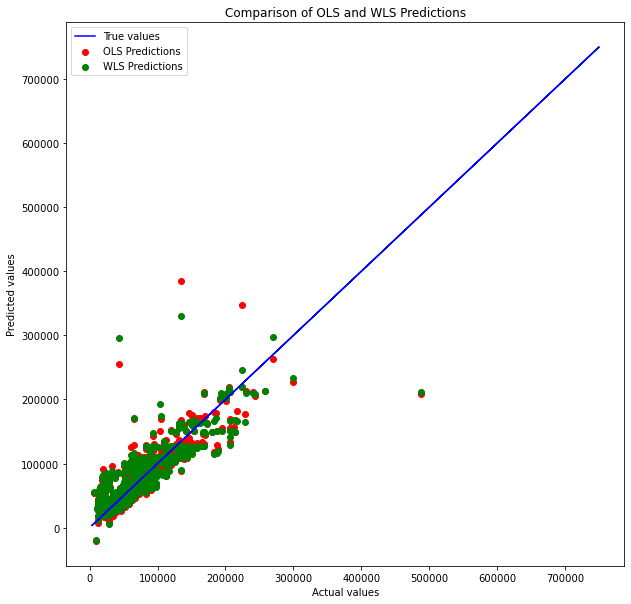

In [ ]:
# Predicted values from OLS and WLS models
# Plotting
plt.figure(figsize=(10, 10))
plt.scatter(y_val, OLS_y_pred, color='red', label='OLS Predictions')
plt.scatter(y_val, WLS_y_pred, color='green', label='WLS Predictions')
plt.plot(y, y, color='blue', label='True values')  # Line for perfect predictions
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Comparison of OLS and WLS Predictions')
plt.legend()
plt.show()

In [ ]:
X_val

,const,job_experience,gender_Male,job_pay_level_Director II,job_pay_level_Entry Level,job_pay_level_Junior Associate,job_pay_level_Manager,job_pay_level_Manger II,job_pay_level_Partner,job_pay_level_Second Year Associate,...,job_family_group_Patent Law,job_family_group_Pricing Analytics,job_family_group_R&D,job_family_group_Research,job_family_group_Strategy,job_family_group_Technology Services,job_continent_Americas,job_continent_Asia,job_continent_Europe,job_continent_Oceania
998,1.0,7,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1621,1.0,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
611,1.0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
514,1.0,8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
413,1.0,19,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,1.0,15,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
291,1.0,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
754,1.0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
626,1.0,7,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df3.head()

,gender,annual_salary_amount_in_usd,job_experience,job_pay_level,full_or_part_time,hourly_or_salary,job_family_group,job_continent
0,Female,45000.00,2,Second Year Associate,Full time,Salary,Client Strategy,Americas
1,Male,41644.08,9,Team Lead,Full time,Salary,Catering,Oceania
2,Female,42134.82,5,Junior Associate,Full time,Salary,Client Strategy,Europe
3,Female,43667.64,6,Team Lead,Full time,Salary,Catering,Asia
4,Female,63750.00,7,Senior Associate,Full time,Salary,Graphic Design,Americas


In [ ]:
df3corr = pd.get_dummies(df3, drop_first=True)

In [ ]:
df3corr.head()

,annual_salary_amount_in_usd,job_experience,gender_Male,job_pay_level_Director II,job_pay_level_Entry Level,job_pay_level_Junior Associate,job_pay_level_Manager,job_pay_level_Manger II,job_pay_level_Partner,job_pay_level_Second Year Associate,...,job_family_group_Patent Law,job_family_group_Pricing Analytics,job_family_group_R&D,job_family_group_Research,job_family_group_Strategy,job_family_group_Technology Services,job_continent_Americas,job_continent_Asia,job_continent_Europe,job_continent_Oceania
0,45000.00,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,41644.08,9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,42134.82,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,43667.64,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,63750.00,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


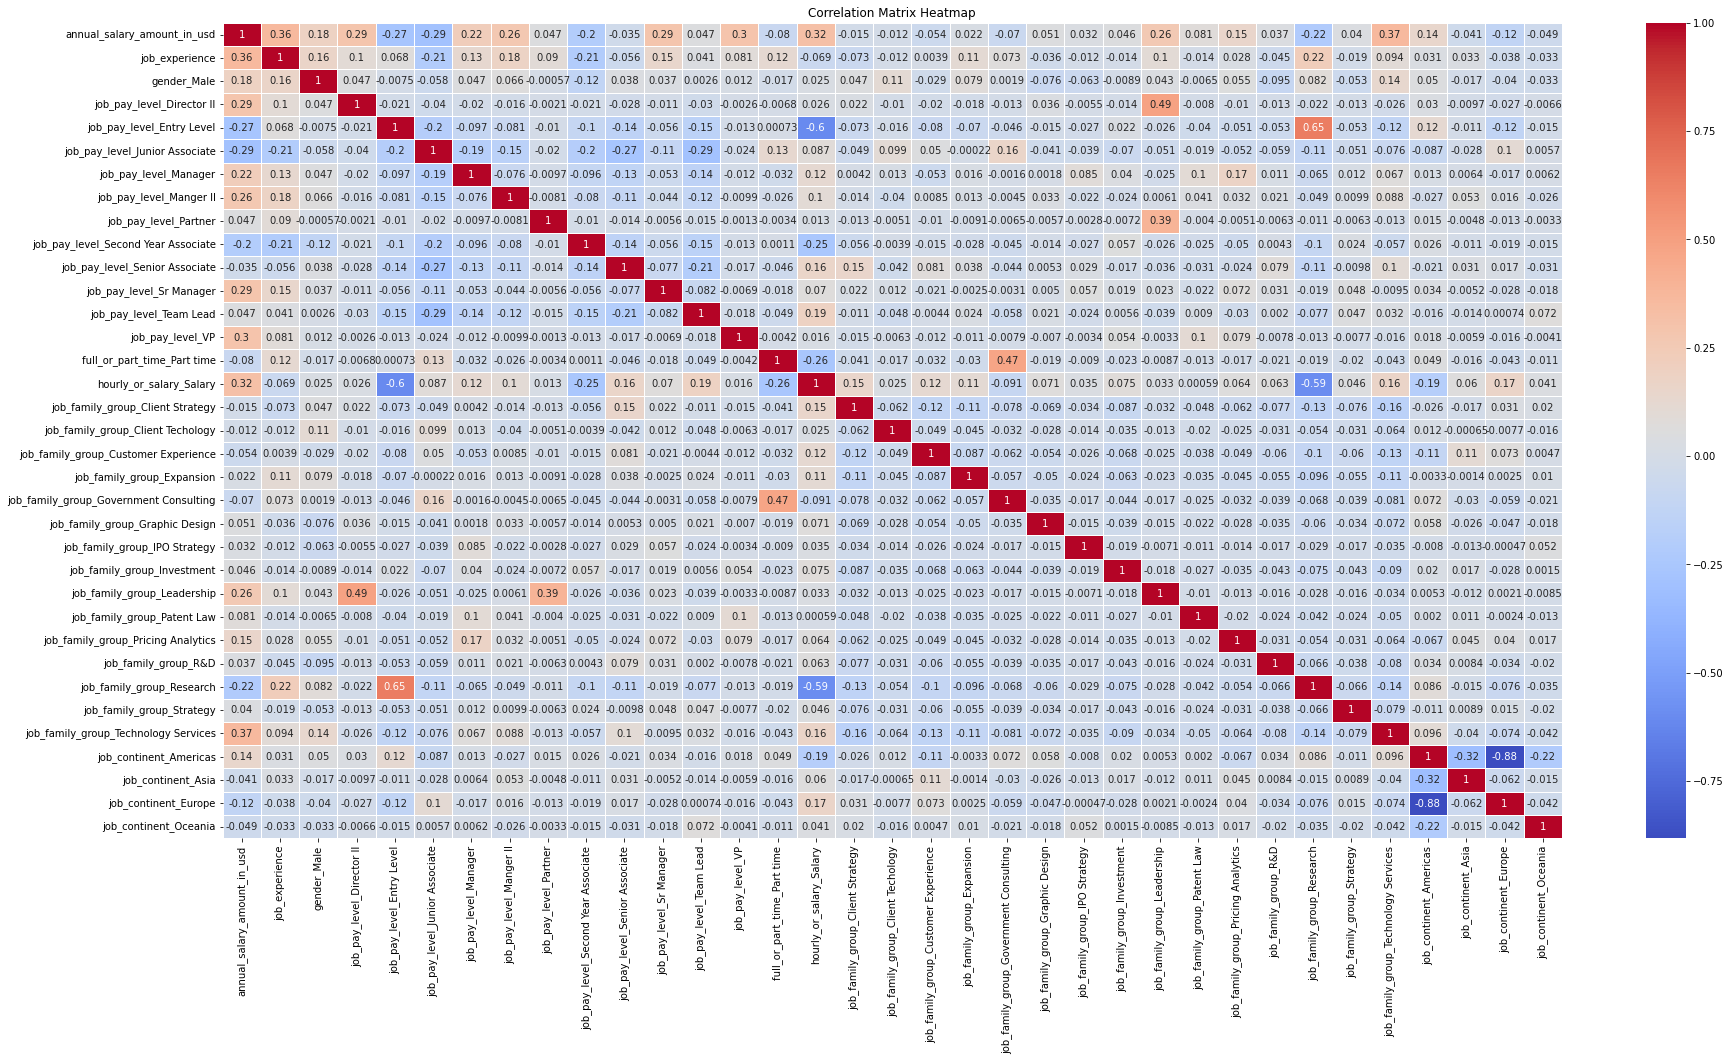

In [ ]:
# Calculate and display the correlation matrix
correlation_matrix = df3corr.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**EVALUATION**

In [ ]:
# WLS predicted values for evaluation
mm2.fittedvalues

employee_id
100650518    46060.203224
100362807    47422.484890
100568527    42340.489566
100296166    42510.411779
100825514    70252.561176
                 ...     
100439883    40261.167325
100035325    66440.607496
100932674    27570.269746
100419347    67316.366349
100204255    37341.767396
Length: 1920, dtype: float64

In [ ]:
# make copy of data with ols and wls prediction
mdf = df2.copy()
mdf

,gender,annual_salary_amount_in_usd,job_experience,job_pay_level,full_or_part_time,hourly_or_salary,job_family_group,job_continent,weight,ols_pred,wls_pred
employee_id,,,,,,,,,,,
100650518,Female,45000.00,2,Second Year Associate,Full time,Salary,Client Strategy,Americas,2.920726e-09,41340.09,45386.01
100362807,Male,41644.08,9,Team Lead,Full time,Salary,Catering,Oceania,1.005067e-08,50326.99,50384.37
100568527,Female,42134.82,5,Junior Associate,Full time,Salary,Client Strategy,Europe,2.920726e-09,37727.16,45517.84
100296166,Female,43667.64,6,Team Lead,Full time,Salary,Catering,Asia,1.005067e-08,44496.51,48837.41
100825514,Female,63750.00,7,Senior Associate,Full time,Salary,Graphic Design,Americas,8.649861e-10,58322.14,61560.55
...,...,...,...,...,...,...,...,...,...,...,...
100439883,Male,48000.00,5,Junior Associate,Full time,Salary,Catering,Americas,1.005067e-08,37611.72,37244.63
100035325,Male,75000.00,5,Junior Associate,Full time,Salary,Investment,Americas,5.610108e-09,58986.07,62357.92
100932674,Female,26520.00,1,Second Year Associate,Full time,Hourly,Catering,Americas,1.005067e-08,27978.05,30377.90


In [ ]:
# add new evaluated predicted values of wls model
mdf["wls_new"] = round(mm2.fittedvalues, 2)

In [ ]:
mdf.head() #show sample

,gender,annual_salary_amount_in_usd,job_experience,job_pay_level,full_or_part_time,hourly_or_salary,job_family_group,job_continent,weight,ols_pred,wls_pred,wls_new,ols_new
employee_id,,,,,,,,,,,,,
100650518,Female,45000.00,2,Second Year Associate,Full time,Salary,Client Strategy,Americas,2.920726e-09,41340.09,45386.01,46060.20,38702.63
100362807,Male,41644.08,9,Team Lead,Full time,Salary,Catering,Oceania,1.005067e-08,50326.99,50384.37,47422.48,50800.81
100568527,Female,42134.82,5,Junior Associate,Full time,Salary,Client Strategy,Europe,2.920726e-09,37727.16,45517.84,42340.49,35980.98
100296166,Female,43667.64,6,Team Lead,Full time,Salary,Catering,Asia,1.005067e-08,44496.51,48837.41,42510.41,39024.12
100825514,Female,63750.00,7,Senior Associate,Full time,Salary,Graphic Design,Americas,8.649861e-10,58322.14,61560.55,70252.56,67025.52


In [ ]:
# add current ols predicted values for evaluation
mdf["ols_new"] = round(OLS_model1.fittedvalues, 2)

In [ ]:
# calculate pay gap and difference for evaluated Wls model
Wlsms = mdf.groupby("gender")["wls_new"].median()
Wlspg = ((Wlsms["Male"] - Wlsms["Female"]) / Wlsms["Male"]) * 100
print(f"WLS Predicted Gender Pay Gap: {round(Wlspg, 2)}")
print(f"WLS Prediction Difference: {round(Wlspg - Actual_Pay_Gap, 2)}")

WLS Predicted Gender Pay Gap: 14.84
WLS Prediction Difference: -3.73


In [ ]:
# calculate pay gap and difference for evaluated Ols model
olsms = mdf.groupby("gender")["ols_new"].median()
olspg = ((olsms["Male"] - olsms["Female"]) / olsms["Male"]) * 100
print(f"OLS Predicted Gender Pay Gap: {round(olspg, 2)}")
print(f"OLS Prediction Difference: {round(olspg - Actual_Pay_Gap, 2)}")

WLS Predicted Gender Pay Gap: 18.97
WLS Prediction Difference: 0.41


In [ ]:
#calculate model errors
wls_error = mdf["annual_salary_amount_in_usd"] - mdf["wls_new"]
ols_error = mdf["annual_salary_amount_in_usd"] - mdf["ols_new"]

In [ ]:
# evaluate root mean squared errors of models
orsme = np.sqrt((ols_error ** 2).mean())
wrsme = np.sqrt((wls_error ** 2).mean())

In [ ]:
#p print root mean squared error values
print(f"ols rsme: {round(orsme, 2)}")
print(f"wls rsme: {round(wrsme, 2)}")

ols rsme: 24395.89
wls rsme: 25711.93
